# Merge datasets

In [1]:
import matplotlib.pyplot as plt

from common import CURRENT_DUMP_FILENAME, get_data_directory

from allisbns.dataset import CodeDataset, load_bencoded, unpack_data
from allisbns.isbn import LAST_ISBN, get_prefix_bounds
from allisbns.plotting import BlockBinnedPlotter


%load_ext autoreload
%autoreload 2

## Load data

In [2]:
input_path = get_data_directory() / CURRENT_DUMP_FILENAME
input_path.name

'aa_isbn13_codes_20251222T170326Z.benc.zst'

In [3]:
with open(input_path, "rb") as f:
    input_data = load_bencoded(f)

In [4]:
input_data.keys()

dict_keys([b'airitibooks', b'bloomsbury', b'cadal_ssno', b'cerlalc', b'chinese_architecture', b'duxiu_ssid', b'edsebk', b'gbooks', b'goodreads', b'hathi', b'huawen_library', b'ia', b'isbndb', b'isbngrp', b'kulturpass', b'libby', b'md5', b'motw', b'nexusstc', b'nexusstc_download', b'oclc', b'ol', b'ptpress', b'rgb', b'sciencereading', b'shukui', b'sklib', b'trantor', b'wanfang', b'zjjd'])

In [5]:
# Let's work just with the 978 region
prefix = "978"

In [6]:
md5 = CodeDataset(unpack_data(input_data[b"md5"]), fill_to_isbn=LAST_ISBN)
md5 = md5.reframe(*get_prefix_bounds(prefix))
md5

CodeDataset(array([6, 1, 9, ..., 1, 2, 2], shape=(14517961,), dtype=int32), bounds=(978000000000, 978999999999))

In [7]:
another_collection = "rgb"

another = CodeDataset(
    unpack_data(input_data[another_collection.encode()]), fill_to_isbn=LAST_ISBN
)

another = another.reframe(*get_prefix_bounds(prefix))
another

CodeDataset(array([     0, 137268,      1, ...,      6,      3,    866],
      shape=(1510528,), dtype=int32), bounds=(978000000000, 978999999999))

In [8]:
figure_size = (12, 12)

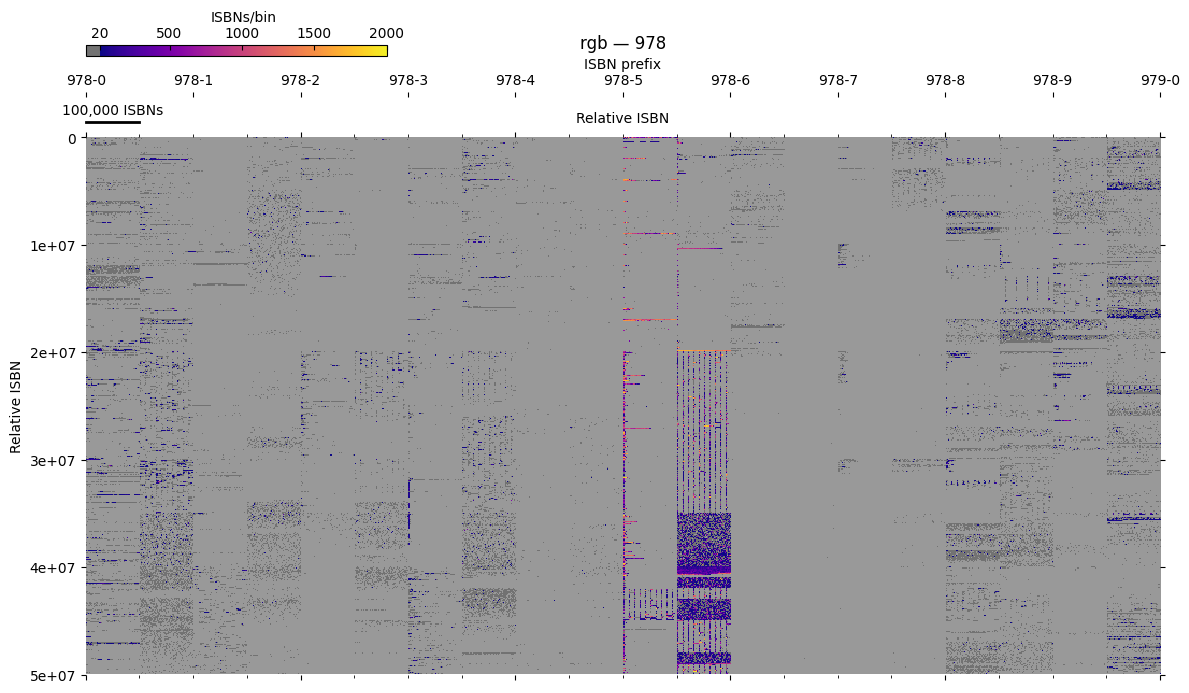

In [9]:
fig, ax = plt.subplots(figsize=figure_size)

binned = another.bin(bin_size=2000)

plotter = BlockBinnedPlotter(ax, bin_size=binned.bin_size)
plotter.plot_bins(binned)

plt.title(f"{another_collection} — {prefix}")

plt.tight_layout()
plt.show()

## Find intersection and difference

### Intersect two datasets

In [10]:
from allisbns import merge


intersection = merge.intersection([md5, another])
intersection

CodeDataset(array([     0, 191160,      1, ...,      4,      2,    877],
      shape=(624364,), dtype=int32), bounds=(978000000000, 978999999999))

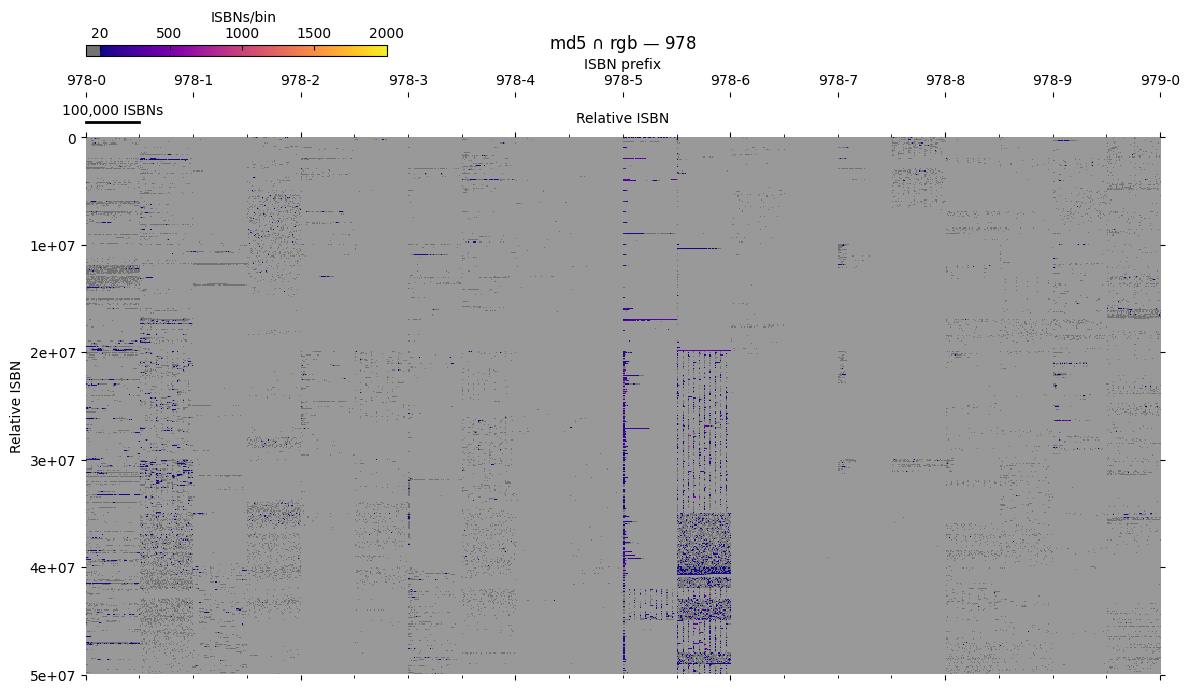

In [11]:
fig, ax = plt.subplots(figsize=figure_size)

binned = intersection.bin(bin_size=2000)

plotter = BlockBinnedPlotter(ax, bin_size=binned.bin_size)
plotter.plot_bins(binned)

plt.title(rf"md5 $\cap$ {another_collection} — {prefix}")

plt.tight_layout()
plt.show()

### Extract one dataset from another

In [12]:
difference = merge.difference([md5, another])
difference

CodeDataset(array([6, 1, 9, ..., 1, 2, 2], shape=(14167999,), dtype=int32), bounds=(978000000000, 978999999999))

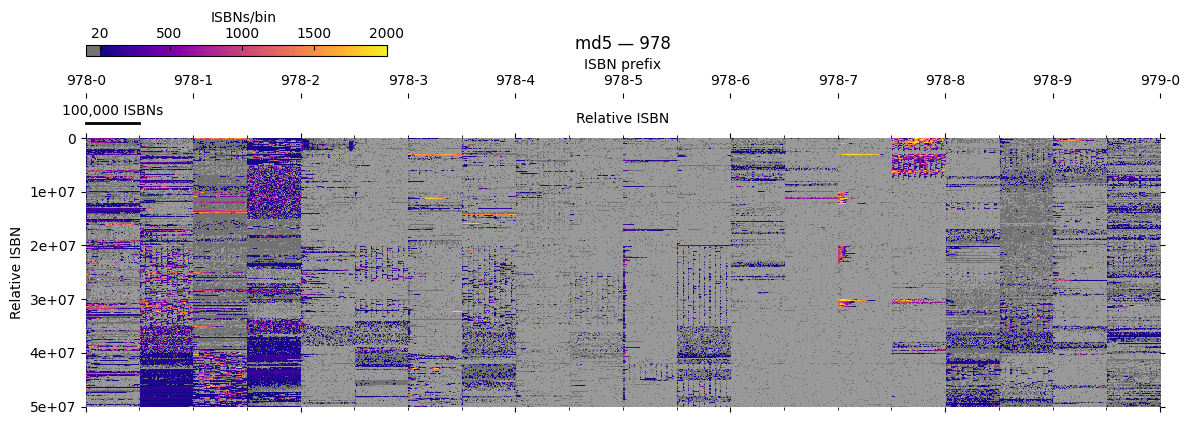

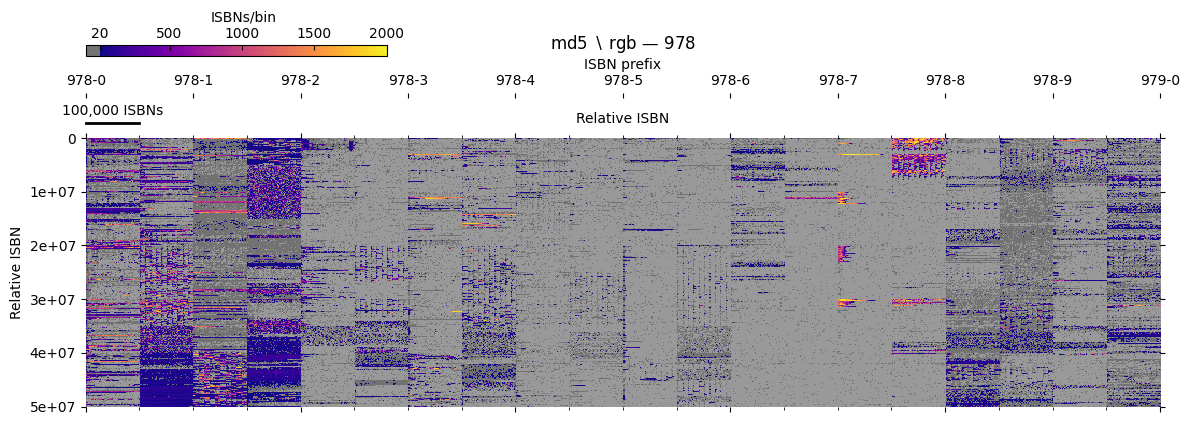

In [13]:
# Plot the first figure
fig, ax = plt.subplots(figsize=figure_size)

bin_size = 2000
plotter_kwargs = {"bin_size": bin_size, "aspect": 0.5}

binned = md5.bin(bin_size=bin_size)
plotter = BlockBinnedPlotter(ax, **plotter_kwargs)
plotter.plot_bins(binned)

ax.set_title(rf"md5 — {prefix}")

plt.tight_layout()
plt.show()

# Plot the second figure
fig, ax = plt.subplots(figsize=figure_size)

binned = difference.bin(bin_size=bin_size)
plotter = BlockBinnedPlotter(ax, **plotter_kwargs)
plotter.plot_bins(binned)

ax.set_title(rf"md5 $\setminus$ {another_collection} — {prefix}")

plt.tight_layout()
plt.show()